<a href="https://colab.research.google.com/github/00hamza00/Data-Science-and-Decision-Making/blob/master/Lab4/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [0]:
df_bank = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv',
                      delimiter=';')

df_dummies = pd.get_dummies(df_bank)

In [0]:
df_bank.head()

In [0]:
df_copy = df_bank.copy()
df_dummies.head()

In [0]:
df_dummies = df_dummies.drop(['duration','y_no'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f946de08198>]],
      dtype=object)

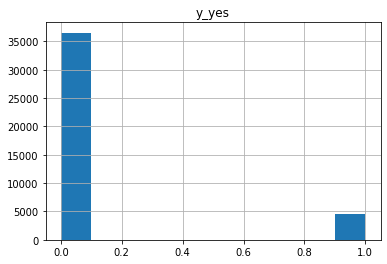

In [65]:
df_dummies.hist(column='y_yes')

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

y=df_dummies['y_yes']
X= df_dummies.drop(['y_yes'], axis=1)

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X,y)
ExtraTreesClassifier(random_state=0)



In [69]:
scores = cross_val_score(clf, X, y, cv=10,scoring = make_scorer(acc))

print(scores)

[0.8873513  0.86064579 0.31803836 0.77421704 0.73974266 0.43408594
 0.34158776 0.16314639 0.47935891 0.25959203]


[ 0  1  7  2  8 61  4 36 38  9  5 22 28 31  6 56 55 23 58 57 18 54 39 41
 30  3 27 21 10 50 13 16 42 59 14 25 60 43 32 33 34 52 26 49 15 17 11 19
 44 12 48 51 47 53 45 20 37 40 46 24 29 35]
Feature ranking:
1. age (0.157143)
2. campaign (0.104946)
3. euribor3m (0.097781)
4. pdays (0.040962)
5. nr.employed (0.038909)
6. poutcome_success (0.028999)
7. emp.var.rate (0.027201)
8. housing_no (0.020429)
9. housing_yes (0.020414)
10. job_admin. (0.017378)
11. cons.price.idx (0.016786)
12. marital_married (0.016761)
13. education_high.school (0.015962)
14. education_university.degree (0.015374)
15. cons.conf.idx (0.015197)
16. day_of_week_thu (0.014847)
17. day_of_week_mon (0.014783)
18. marital_single (0.014575)
19. day_of_week_wed (0.014524)
20. day_of_week_tue (0.014436)
21. job_technician (0.014197)
22. day_of_week_fri (0.013967)
23. loan_no (0.013815)
24. loan_yes (0.013675)
25. education_professional.course (0.012111)
26. previous (0.011796)
27. education_basic.9y (0.011203)
28. marital_

(0, 0.17076014307410048)

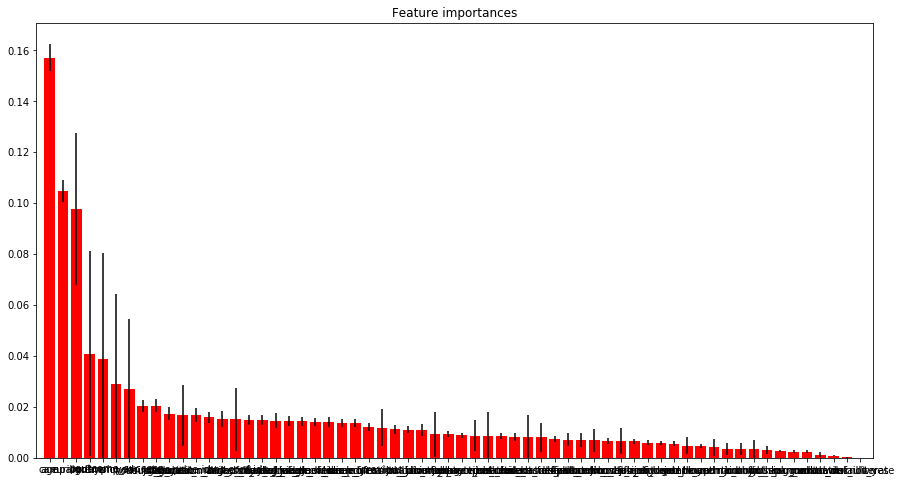

In [71]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


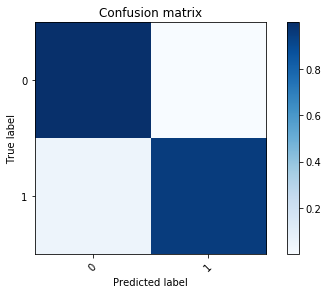

In [73]:
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = True,
                      title='Confusion matrix')